In [1]:
import torch

import numpy as np
import torch.nn as nn

from architecture.WGN.pignn import FlowPIGNN

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# Load the data from a past experiment
case_nr = 1
max_angle = 30
seq_length = 1
wake_steering = True
use_graph = True

num_epochs = 300
early_stop_after = 12
output_size = 128*128

batch_size = 64
data_folder = f"../../Data/WGN_train_data"

model_cfg = {
        'edge_in_dim': 2,
        'node_in_dim': 4,
        'global_in_dim': 2,
        'n_pign_layers': 3,
        'edge_hidden_dim': 50,
        'node_hidden_dim': 50,
        'global_hidden_dim': 50,
        'num_nodes': 10,
        'residual': True,
        'input_norm': True,
        'pign_mlp_params': {
            'num_neurons': [256, 128],
            'hidden_act': 'ReLU',
            'out_act': 'ReLU'
        },
        'reg_mlp_params': {
            'num_neurons': [64, 128, 256],
            'hidden_act': 'ReLU',
            'out_act': 'ReLU'
        },
    }
 
train_cfg = {
    'max_angle': max_angle,
    'num_epochs': num_epochs,
    'use_graph': use_graph,
    'early_stop_after': early_stop_after,
    'batch_size': batch_size,
    'output_size': output_size,
}


In [5]:
dataset = WGNDataset(data_folder, max_angle)
total_size = len(dataset)

train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



In [6]:
model = FlowPIGNN(**model_cfg).to(device)
model

In [7]:
output_folder = "WGN_parameters"
model.train()


train(model, train_cfg, train_loader, val_loader, output_folder)

In [8]:
def count_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 906865 parameters without deconv
# 915874 parameters with deconv, conv gives only 1 percent of the params
# 907006 for FCN

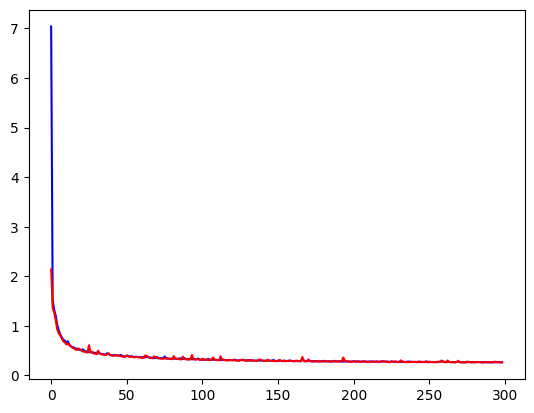

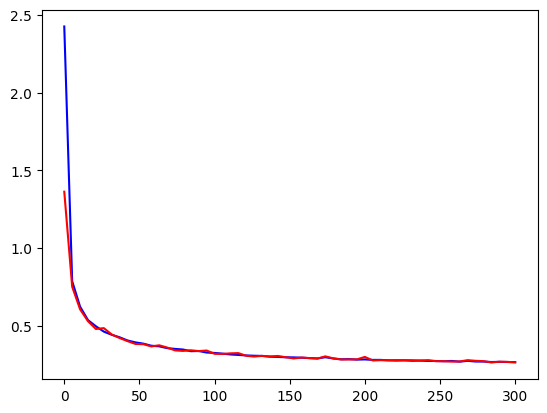

In [21]:
import matplotlib.pyplot as plt

n_means = 5

train_loss = np.load("train_data/train_loss.npy")
val_loss = np.load("train_data/val_loss.npy")
plt.plot(train_loss, 'b', label='train loss')
plt.plot(val_loss, 'r', label='val loss')
plt.show()

train_loss = np.array([(train_loss[n_means*i]+train_loss[n_means*i+1]+train_loss[n_means*i+2]+train_loss[n_means*i+3]+train_loss[n_means*i+4])/n_means for i in range(int(len(train_loss)/n_means -1))])
val_loss = np.array([(val_loss[n_means*i]+val_loss[n_means*i+1]+val_loss[n_means*i+2]+val_loss[n_means*i+3]+val_loss[n_means*i+4])/n_means for i in range(int(len(val_loss)/n_means-1))])
epochs = np.linspace(0, num_epochs,len(train_loss))

plt.plot(epochs, train_loss, 'b', label='train loss')
plt.plot(epochs, val_loss, 'r', label='val loss')
plt.show()

In [9]:
test_loader_ = torch.load("test_loader")


graph_model = FlowPIGNN(**model_cfg).to(device)
graph_model.load_state_dict(torch.load("WGN_parameters/WGN_best.pt"))


graph_model.eval()

C:\Users\quiri\AppData\Local\Temp\ipykernel_20096\1296636056.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_loader_ = torch.load("test_loader")
C:\Users\quiri\AppD

FlowPIGNN(
  (gn_layers): ModuleList(
    (0): PIGN(
      (edge_model): MLP 
      Input Norm : BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
      Dimensions : [12, 256, 128, 50] 
      Hidden Act. : ReLU() 
      Out Act. : ReLU() 
      
      (node_model): MLP 
      Input Norm : BatchNorm1d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
      Dimensions : [56, 256, 128, 50] 
      Hidden Act. : ReLU() 
      Out Act. : ReLU() 
      
      (global_model): MLP 
      Input Norm : BatchNorm1d(102, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
      Dimensions : [102, 256, 128, 50] 
      Hidden Act. : ReLU() 
      Out Act. : ReLU() 
      
    )
    (1-2): 2 x PIGN(
      (edge_model): MLP 
      Input Norm : BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
      Dimensions : [200, 256, 128, 50] 
      Hidden Act. : ReLU() 
      Out Act. : ReLU() 
      
      (node_model)